# Objective

> CalculationDataset을 어떻게 다루는지에 대해 다룸


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.append("../")
from utils.dataset import CalculationDataset

### CalculationDataset 불러오기

> CalculationDataset에서의 인자값은 아래와 같다


1. data_type: (train / test / validation) 이중에서 고르세요
2. digit_range : 몇 개의 숫자로 수식을 만들 것인지 결정
    * digit_range가 정수라면? -> 단일 길이로 결정
    * digit_range가 범위라면? -> 범위 내에서 결정

3. bg_noise : 영상 내 이미지의 배경 잡음. (mean, stddev)로 결정할 수 있고, stddev가 크면 클수록 노이즈의 강도가 강해짐
4. pad_range : 숫자마다의 픽셀 거리에 대한 랜덤 함수

### 1. data_type

> data_type은 필수 인자로, 원하는 데이터셋 종류를 가져옵니다.

In [2]:
train_set = CalculationDataset('train',digit=(5,10))
test_set = CalculationDataset('test',digit=(5,10)) 
validation_set = CalculationDataset('validation',digit=(5,10)) 

---
# dataset 메소드

> 기본적으로 Dataset은 `np.ndarray`와 동일한 형태의 indexing을 지원합니다.

### 1) 원소 인덱싱하기 

In [3]:
image, eq_result, series_len, equation = train_set[0]

> 크게 4가지가 나옵니다. 하나는 연산 식의 이미지인 `image`, 연산 식의 결과값인 `eq_result`, 연산 식에서 실제 수식이 들어가 있는 부분까지의 길이인 `series_len`, 그리고 수식 정보인 `equation`로 나뉘어서 나옵니다.

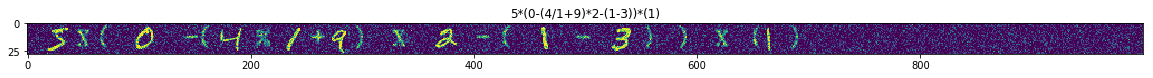

In [4]:
plt.figure(figsize=(20,10))
plt.title(equation)
plt.imshow(image)
plt.show()

In [5]:
print("equation : ", equation)
print("eq_result : ",eq_result)
print("series_len : ",series_len)


equation :  5*(0-(4/1+9)*2-(1-3))*(1)
eq_result :  -120.0
series_len :  720


### 2) Slice 인덱싱하기

In [6]:
images, eq_results, series_lens, equations = train_set[0:5]

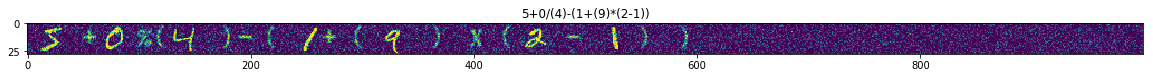

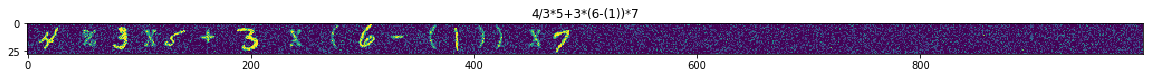

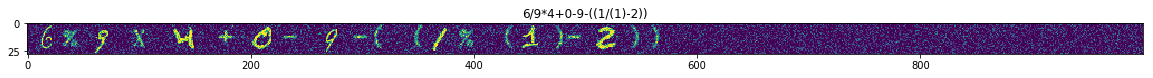

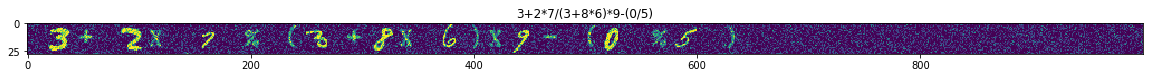

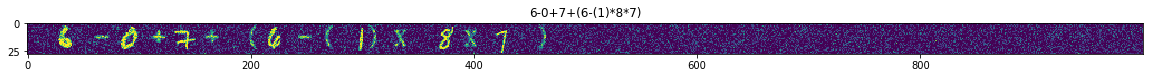

In [7]:
for image, eq_result, series_len, equation in zip(images, eq_results, series_lens, equations):
    plt.figure(figsize=(20,10))
    plt.title(equation)
    plt.imshow(image)
    plt.show()

### 3) list 인덱싱하기

In [8]:
images, eq_results, series_lens, equations = train_set[[0, 2]]

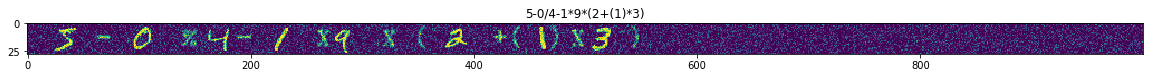

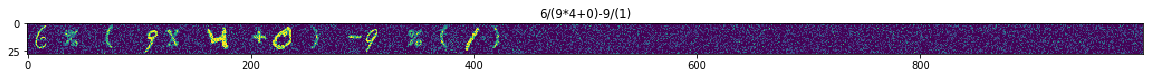

In [9]:
for image, eq_result, series_len, equation in zip(images, eq_results, series_lens, equations):
    plt.figure(figsize=(20,10))
    plt.title(equation)
    plt.imshow(image)
    plt.show()

참고로 같은 인덱싱으로 꺼내오면, **숫자의 배치만 동일할 뿐**, 그 외에는 모두 바뀌게 되어 있습니다.

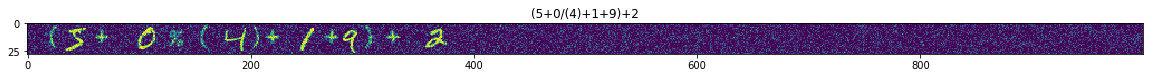

In [10]:
image, eq_result, series_len, equation = train_set[0]
plt.figure(figsize=(20,10))
plt.title(equation)
plt.imshow(image)
plt.show()

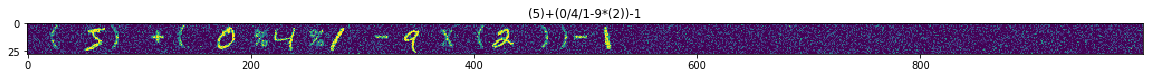

In [11]:
image, eq_result, series_len, equation = train_set[0]
plt.figure(figsize=(20,10))
plt.title(equation)
plt.imshow(image)
plt.show()

### 데이터를 섞고 싶으면, `shuffle`함수를 호출하시면 됩니다.

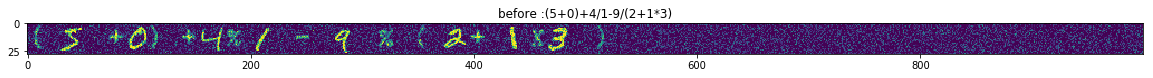

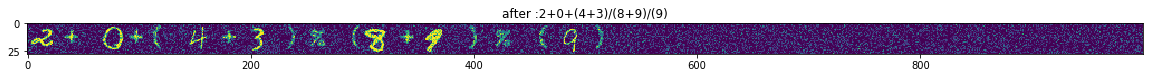

In [12]:
image, eq_result, series_len, equation = train_set[0]
plt.figure(figsize=(20,10))
plt.title("before :"+equation)
plt.imshow(image)
plt.show()

train_set.shuffle()

image, eq_result, series_len, equation = train_set[0]
plt.figure(figsize=(20,10))
plt.title("after :"+equation)
plt.imshow(image)
plt.show()

> 수의 배치가 달라짐을 확인할 수 있습니다.

### 데이터셋에 몇 개의 데이터가 있는지를 확인하고 싶으면, `len`을 이용하면 됩니다.

In [13]:
len(train_set) # train_set의 데이터 갯수는 다음과 같습니다.

6111

즉 인덱싱으로 6111보다 크거나 값 범위는 범위 초과로 가져올 수 없습니다.

In [16]:
train_set[6110]

(array([[0.05636979, 0.        , 0.20292356, ..., 0.        , 0.09333039,
         0.        ],
        [0.        , 0.        , 0.06655437, ..., 0.19793185, 0.        ,
         0.        ],
        [0.        , 0.18504365, 0.26511729, ..., 0.03432379, 0.        ,
         0.19484543],
        ...,
        [0.        , 0.        , 0.        , ..., 0.3046367 , 0.        ,
         0.        ],
        [0.        , 0.        , 0.1629552 , ..., 0.12162246, 0.        ,
         0.        ],
        [0.        , 0.12436848, 0.07879876, ..., 0.        , 0.        ,
         0.13212626]]), -4.833333333333333, 494, '1+(1)/1+((1/6-7))')

In [29]:
train_set[6112]

ValueError: low >= high

----

### 2. digit_range

> digit_range은 몇개의 숫자를 이용해 수식을 만들 것인가를 결정하는 인자로, 범위(tuple)로 주면 랜덤한 길이대로 나오고, 정수값으로 주면 고정 길이로 나오게 됩니다.

In [30]:
train_set = CalculationDataset('train',digit=5)

> digit을 정수값으로 하면 아래처럼 됩니다.

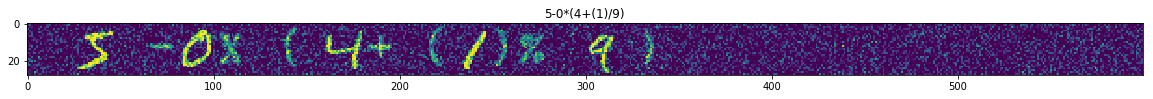

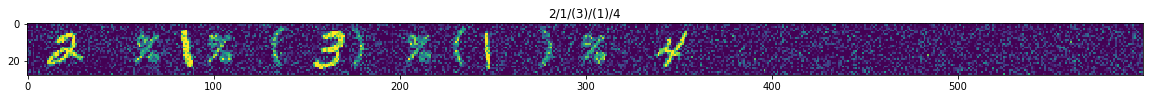

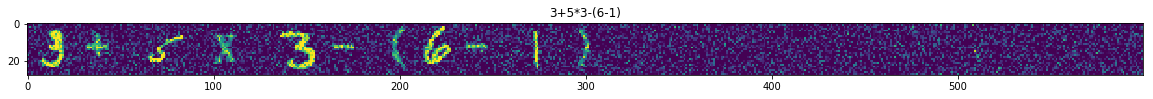

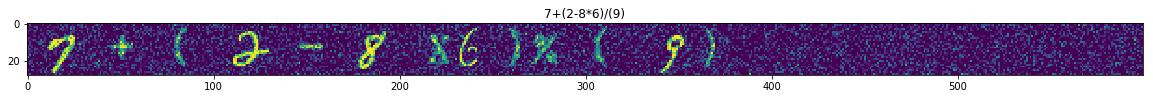

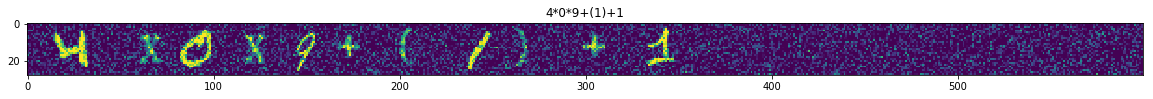

In [31]:
images, eq_results, series_lens, equations = train_set[0:5]

for image, eq_result, series_len, equation in \
    zip(images, eq_results, series_lens, equations):

    plt.figure(figsize=(20,10))
    plt.title(equation)
    plt.imshow(image)
    plt.show()

### 3. bg_noise 
> 영상 내 이미지의 배경 잡음. (mean, stddev)로 결정할 수 있고, stddev가 크면 클수록 노이즈의 강도가 강해집니다.

In [34]:
# 0.2->0.4로 올림
train_set = CalculationDataset('train',digit=5,bg_noise=(0,0.4))

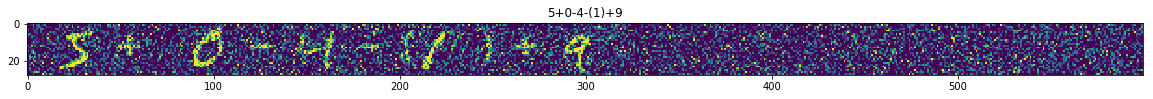

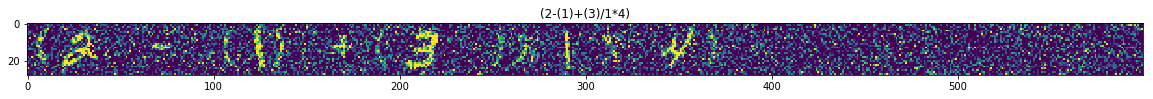

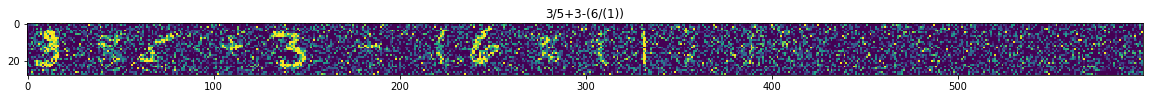

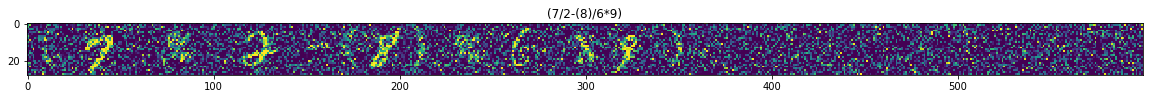

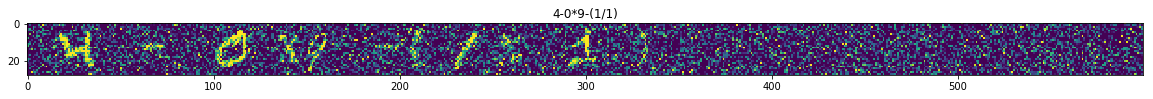

In [35]:
images, eq_results, series_lens, equations = train_set[0:5]

for image, eq_result, series_len, equation in \
    zip(images, eq_results, series_lens, equations):

    plt.figure(figsize=(20,10))
    plt.title(equation)
    plt.imshow(image)
    plt.show()

### 3. pad_range 
> 영상 내 padding 간격을 결정. 범위에 따라 랜덤하게 결정

In [37]:
# (3,30)-> (3,50)으로 변경
train_set = CalculationDataset('train',digit=5,pad_range=(3,50))

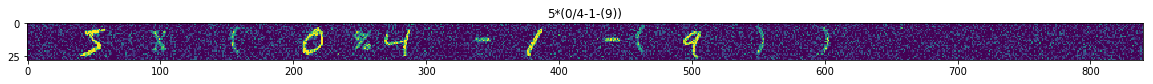

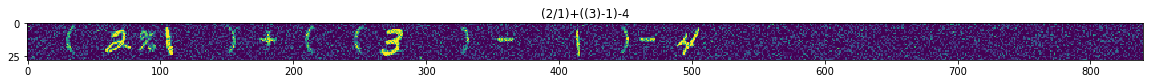

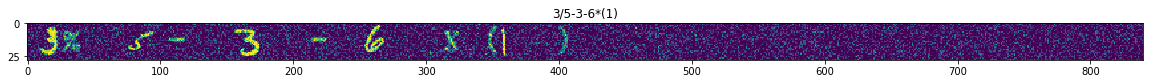

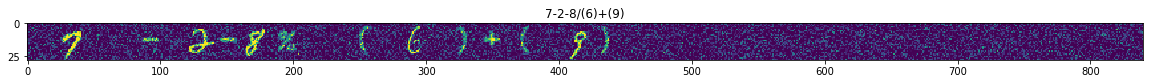

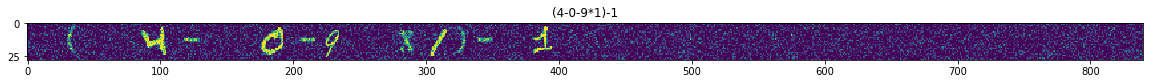

In [38]:
images, eq_results, series_lens, equations = train_set[0:5]

for image, eq_result, series_len, equation in \
    zip(images, eq_results, series_lens, equations):

    plt.figure(figsize=(20,10))
    plt.title(equation)
    plt.imshow(image)
    plt.show()